In [2]:
#Description 

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from pandas import Series,DataFrame
%matplotlib inline
import seaborn as sns

# loading the dataset

In [2]:
data = pd.read_excel('LungCap Dataset.xls')

# size of data

In [3]:
data.size

4350

# No.of rows and columns in our data

In [5]:
data.shape

(725, 6)

# statistical characteristics of the data

In [177]:
data.describe()

,LungCap(cc),Age( years),Height(inches)
count,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276
std,2.662008,4.004750,7.202144
min,0.507000,3.000000,45.300000
25%,6.150000,9.000000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.800000,15.000000,70.300000
max,14.675000,19.000000,81.800000


# check the column names

In [178]:
data.columns

Index(['LungCap(cc)', 'Age( years)', 'Height(inches)', 'Smoke', 'Gender',
       'Caesarean'],
      dtype='object')

# Checking the Numerical Features,Categorical Features, Alphanumeric Features

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
LungCap(cc)       725 non-null float64
Age( years)       725 non-null int64
Height(inches)    725 non-null float64
Smoke             725 non-null object
Gender            725 non-null object
Caesarean         725 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


There are columns with float64(2), int64(1), object(3).
And there are no null items in the dataset

# displaying the first five rows of the dataset

In [180]:
data.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


# display the last five rows of the train dataset

In [181]:
data.tail()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no
724,7.100,10,67.7,no,male,no


# Now droping the 'Height(inches)' column since it's unnecessary for the prediction process and adding it to a new dataset.

In [182]:
data1 = data.drop(["Height(inches)"], axis=1)

# checking again the data size after dropping the 'Height(inches)' variable

In [184]:
data1.head()

,LungCap(cc),Age( years),Smoke,Gender,Caesarean
0,6.475,6,no,male,no
1,10.125,18,yes,female,no
2,9.550,16,no,female,yes
3,11.125,14,no,male,no
4,4.800,5,no,male,no


we will be performing our further operations on the new dataset(data1)

# Check the Outliers for data1['LungCap(cc)']

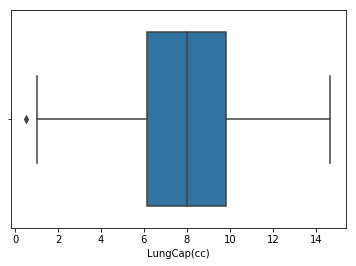

In [189]:
sns.boxplot(data1['LungCap(cc)'])
plt.show()

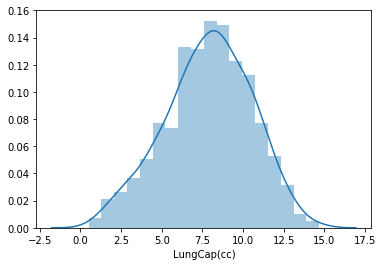

In [202]:
sns.distplot(data['LungCap(cc)'])
plt.show()

using boxplot we can infer that there is only a single outlier

# initially checking the skewness of data1['LungCap(cc)']

In [192]:
data1['LungCap(cc)'].skew()

-0.22787342323500312

#through this we can say that data1['LungCap(cc)'] is left skewed as the skewness < 0.

# Deleting outliers in data1['LungCap(cc)'] using IQR method

In [193]:
q1 = data['LungCap(cc)'].quantile(q = 0.25)
q2 = data['LungCap(cc)'].quantile(q = 0.50)
q3 = data['LungCap(cc)'].quantile(q = 0.75)
iqr = q3 - q1
ul = q3 + (1.5*iqr)
ll = q1 -(1.5*iqr)



outliers

In [197]:
data[((data['LungCap(cc)']> ul)|(data['LungCap(cc)']<ll))]

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
149,0.507,3,51.6,no,female,yes


removing these outliers

In [198]:
new = data[~((data['LungCap(cc)']> ul)|(data['LungCap(cc)']<ll))]

now checking new size of the dataset

In [200]:
new.shape

(724, 6)

new skewness of the (data['LungCap(cc)']

In [203]:
new['LungCap(cc)'].skew()

-0.21323235855718817

# plotting hist to check which age people are mostly present in our dataset

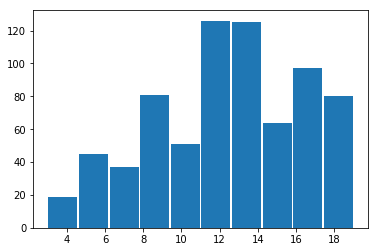

In [205]:
plt.hist(data1['Age( years)'],rwidth = 0.95)
plt.show()

people with the age group between 11-14 are more mostly presnt in our dataset

# total count of males and females

In [210]:
data1['Gender'].value_counts()

male      367
female    358
Name: Gender, dtype: int64

# graphical representation of total count of males and females using barplot and pieplot

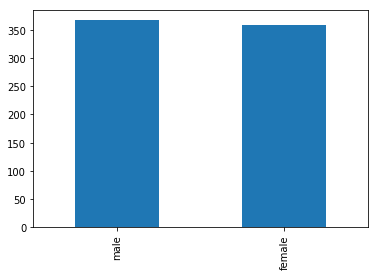

In [241]:
#barplot
data1.Gender.value_counts().plot(kind = 'bar')
plt.show()

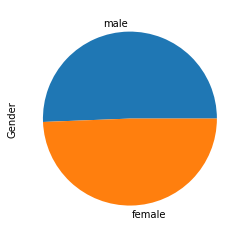

In [242]:
#pieplot
data1.Gender.value_counts().plot(kind = 'pie')
plt.show()

# graphical representation of total count of smokers and non-smokers using barplot

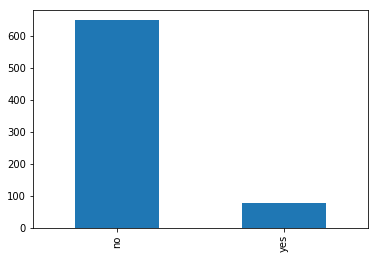

In [213]:
data1.Smoke.value_counts().plot(kind = 'bar')
plt.show()

# total count of smokers and non-smokers

In [214]:
data1['Smoke'].value_counts()

no     648
yes     77
Name: Smoke, dtype: int64

# comparing which gender smokes more using countplot

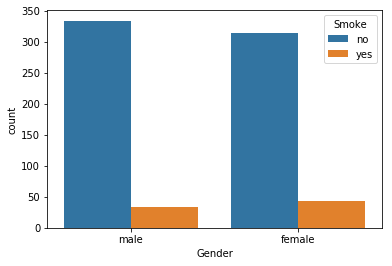

In [219]:
sns.countplot(x = 'Gender',data = data1, hue = 'Smoke')
plt.show()

either doesnt smoke much.but comparitively females smoke more than males. but there is only minor diff

# 

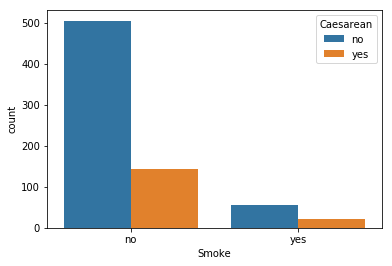

In [226]:
sns.countplot(x = 'Smoke',data = data1, hue = 'Caesarean')
plt.show()

#Smoking is not directly proportional to Ceasarean


# comparing which gender has more luncapacity more using barplot


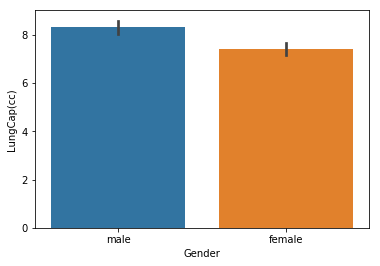

In [228]:
sns.barplot(x="Gender", y="LungCap(cc)", data=data1)
plt.show()

it is observed that males has more lunCap(cc) than females

# Pairplot to view all the numerical feature comparision of our dataset

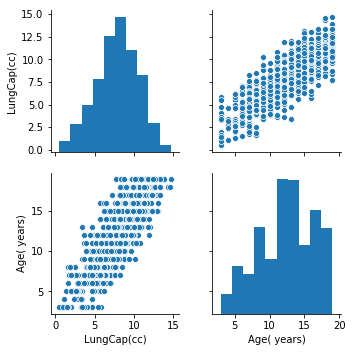

In [237]:
sns.pairplot(data1)
plt.show()

# Scatter plot for data1['LungCap(cc)'],data1['Age( years)']

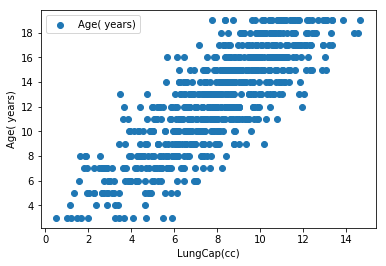

In [245]:
plt.scatter(data1['LungCap(cc)'],data1['Age( years)'])
plt.xlabel("LungCap(cc)")
plt.ylabel("Age( years)")
plt.legend()
plt.show()

# lmplot

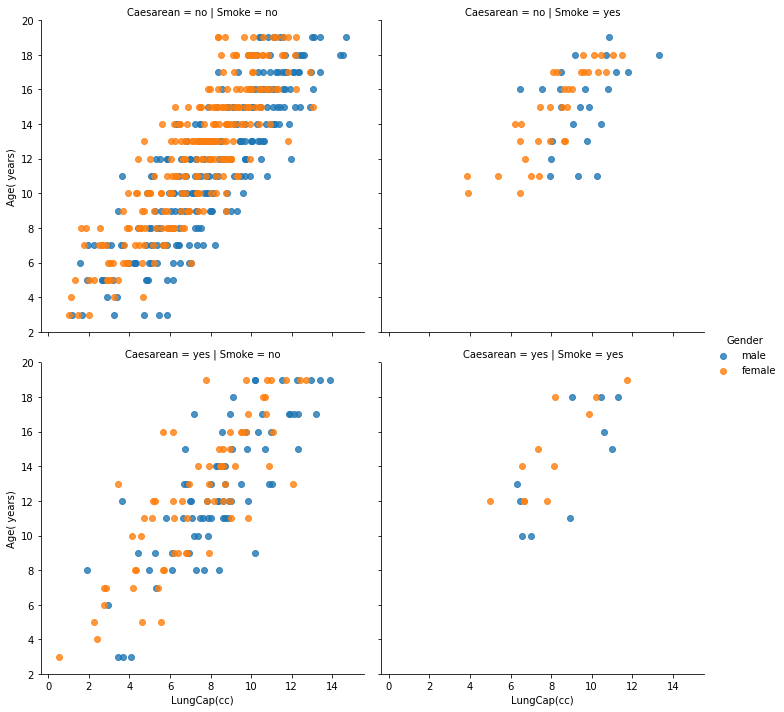

In [248]:
sns.lmplot(x = 'LungCap(cc)', y ='Age( years)',data = data1, fit_reg = False, hue= 'Gender',col = 'Smoke',row = 'Caesarean')
plt.show()